# Run the `Heat` model through its BMI

`Heat` models the diffusion of temperature on a uniform rectangular plate with Dirichlet boundary conditions. View the source code for the [model](https://github.com/csdms/bmi-example-python/blob/master/heat/heat.py) and its [BMI](https://github.com/csdms/bmi-example-python/blob/master/heat/bmi_heat.py) on GitHub.

Start by importing `os`, `numpy` and the `Heat` BMI:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from heat import BmiHeat

Create an instance of the model's BMI.

In [2]:
x = BmiHeat()

What's the name of this model?

In [3]:
print(x.get_component_name())

The 2D Heat Equation


Start the `Heat` model through its BMI using a configuration file:

In [4]:
cat heat.yaml

# Heat model configuration
shape:
  - 6
  - 8
spacing:
  - 1.0
  - 1.0
origin:
  - 0.0
  - 0.0
alpha: 1.0


In [5]:
x.initialize("heat.yaml")

Check the time information for the model.

In [6]:
stateOut = x.get_state()
print(stateOut)

{
    "time": 0.0,
    "plate_surface__temperature": {
        "value": [
            0.7444227320828752,
            0.34022663250676577,
            0.8432555496724361,
            0.060846504441758764,
            0.8446697787107923,
            0.27627788779009277,
            0.5877718799413219,
            0.5737654859660629,
            0.34645112782286935,
            0.37414828806554334,
            0.7846696450611258,
            0.5304173216068899,
            0.0792535018455699,
            0.8793127450388358,
            0.15703439775879213,
            0.3912156458741114,
            0.9707058465142714,
            0.5511025163784199,
            0.1470283563347624,
            0.05645959012302082,
            0.9089090697986834,
            0.4495395294486181,
            0.011832496810315396,
            0.4171122020390934,
            0.33814771386922027,
            0.8466251708240787,
            0.6636025903978577,
            0.342616329035892,
            0.915447

In [7]:
import json
stateOutDict = json.loads(stateOut)

In [8]:
stateOutDict['plate_surface__temperature'][15]=0
print(stateOutDict)

{'time': 0.0, 'plate_surface__temperature': {'value': [0.7444227320828752, 0.34022663250676577, 0.8432555496724361, 0.060846504441758764, 0.8446697787107923, 0.27627788779009277, 0.5877718799413219, 0.5737654859660629, 0.34645112782286935, 0.37414828806554334, 0.7846696450611258, 0.5304173216068899, 0.0792535018455699, 0.8793127450388358, 0.15703439775879213, 0.3912156458741114, 0.9707058465142714, 0.5511025163784199, 0.1470283563347624, 0.05645959012302082, 0.9089090697986834, 0.4495395294486181, 0.011832496810315396, 0.4171122020390934, 0.33814771386922027, 0.8466251708240787, 0.6636025903978577, 0.342616329035892, 0.9154478512615142, 0.14537348896585434, 0.545772555177156, 0.8827706254573504, 0.2851195288529734, 0.47448421167380395, 0.2783120501807711, 0.28066701069377975, 0.841622847809508, 0.7140017886819985, 0.9744899247558164, 0.45762952067167606, 0.22664959884228209, 0.7177555043888103, 0.9900324558495176, 0.7858216954853029, 0.11380231880676006, 0.16366335988935754, 0.78840149

In [9]:
x.set_state(json.dumps(stateOutDict))

In [10]:
print("Start time:", x.get_start_time())
print("End time:", x.get_end_time())
print("Current time:", x.get_current_time())
print("Time step:", x.get_time_step())
print("Time units:", x.get_time_units())

Start time: 0.0
End time: 1.7976931348623157e+308
Current time: 0.0
Time step: 0.25
Time units: s


Show the input and output variables for the component (aside on [Standard Names](https://csdms.colorado.edu/wiki/CSDMS_Standard_Names)):

In [11]:
print(x.get_input_var_names())
print(x.get_output_var_names())

('plate_surface__temperature',)
('plate_surface__temperature',)


Next, get the identifier for the grid on which the temperature variable is defined:

In [12]:
grid_id = x.get_var_grid("plate_surface__temperature")
print("Grid id:", grid_id)

Grid id: 0


Then get the grid attributes:

In [13]:
print("Grid type:", x.get_grid_type(grid_id))

rank = x.get_grid_rank(grid_id)
print("Grid rank:", rank)

shape = np.ndarray(rank, dtype=int)
x.get_grid_shape(grid_id, shape)
print("Grid shape:", shape)

spacing = np.ndarray(rank, dtype=float)
x.get_grid_spacing(grid_id, spacing)
print("Grid spacing:", spacing)

Grid type: uniform_rectilinear
Grid rank: 2
Grid shape: [6 8]
Grid spacing: [1. 1.]


These commands are made somewhat un-Pythonic by the generic design of the BMI.

Through the model's BMI, zero out the initial temperature field, except for an impulse near the middle.
Note that *set_value* expects a one-dimensional array for input.

In [14]:
temperature = np.zeros(shape)
temperature[3, 4] = 100.0
x.set_value("plate_surface__temperature", temperature)

Check that the temperature field has been updated. Note that *get_value* expects a one-dimensional array to receive output.

In [15]:
temperature_flat = np.empty_like(temperature).flatten()
x.get_value("plate_surface__temperature", temperature_flat)
print(temperature_flat.reshape(shape))

[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


Now advance the model by a single time step:

In [16]:
x.update()

View the new state of the temperature field:

In [17]:
x.get_value("plate_surface__temperature", temperature_flat)
print(temperature_flat.reshape(shape))

[[ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  12.5  0.   0.   0. ]
 [ 0.   0.   0.  12.5 50.  12.5  0.   0. ]
 [ 0.   0.   0.   0.  12.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]


There's diffusion!

## Generate an ensemble of models using get_state and set_state
We will demonstrate (some of) the use of get_state and set_state by generating an ensemble of models starting from the state of the one we just initialized, adding noise to each ensemble member and than running all of them forward in time. While running forward, we save the temperature at a single point of interest and plot a graph of all ensemble members to show the ensemble spread over time.

First, we save the current state of the model.

In [18]:
state_out = x.get_state()

State is always returned as a string. In this case the string is formated as JSON, so Let's see what keys are in this state:

In [19]:
dictState = json.loads(state_out)
print(dictState.keys())

dict_keys(['time', 'plate_surface__temperature'])


In [20]:
print(dictState['plate_surface__temperature'].keys())

dict_keys(['value', 'type', 'itemsize', 'nbytes'])


Next, we create an ensemble of BMI model objects. Each model gets initzialized in the same way as ```x``` was above.

In [21]:
nEnsemble = 25
ensemble = []

for ensembleMember in range(nEnsemble):
    ensemble.append(BmiHeat())
    ensemble[ensembleMember].initialize("heat.yaml")

Now, for each ensemble member, we take the state of x, add some noise, and set the state of the member

In [22]:
plate_surface_temp_from_x = np.array(dictState['plate_surface__temperature']['value']).reshape(shape)

for ensembleMember in range(nEnsemble):
    #for each ensemble, start with the same state as x.
    ensembleMemberDictState = dictState
    
    noise = np.zeros_like(plate_surface_temp_from_x)
    noise[2:5,3:6] = 2 * np.random.randn(3,3)
    plate_surface_temp = plate_surface_temp_from_x + noise
    
    #this array we want to set in the state is a numpy array, which has to be transformed 
    #to a list otherwise we can not turn it into a json string.
    ensembleMemberDictState['plate_surface__temperature']['value'] = plate_surface_temp.tolist()
    
    #Turn the state with noise added back into a json string
    ensembleStateJSON = json.dumps(ensembleMemberDictState)
    
    #finally set the state of the ensemble member.
    ensemble[ensembleMember].set_state(ensembleStateJSON)
    
#Note that the above loop is needlessly verbose for educational purposes.
#This does use a lot of memmory. The code below is less readable, but uses less memmory.
#When using bigger models than this example model, this can make a big difference in 
#performance.


plate_surface_temp_from_x = dictState['plate_surface__temperature']['value']
noise = np.zeros(shape)
    
for ensembleMember in range(nEnsemble):

    noise[2:5,3:6] = 2 * np.random.randn(3,3)
    

    dictState['plate_surface__temperature']['value'] = (plate_surface_temp_from_x + 
                                                        noise).flatten().tolist()
    ensemble[ensembleMember].set_state(json.dumps(dictState))


Now run the entire ensemble forward in time. Every timestep, we are saving the temperature of one location of the plate of interest, for each ensemble member.

Note that for bigger models, the for loop in this step can be run in parallel for all the models. 

In [23]:
loc_of_interest = [14]

distant_time = 15.0
output = pd.DataFrame(columns = ['x'])

outputValue = []
while x.get_current_time() < distant_time:
    x.update()
    x.get_value_at_indices('plate_surface__temperature',outputValue, loc_of_interest)
    output.loc[x.get_current_time(),'x'] = outputValue[0]
    
    for ensembleMember in range(nEnsemble):
        ensemble[ensembleMember].update()
        ensemble[ensembleMember].get_value_at_indices('plate_surface__temperature',outputValue, loc_of_interest)
        output.loc[ensemble[ensembleMember].get_current_time(),'ensemble' + str(ensembleMember)] = outputValue[0]
        


View the final state of the temperatures of the entire ensemble at the locaiton of interest:

Text(0, 0.5, 'temperature')

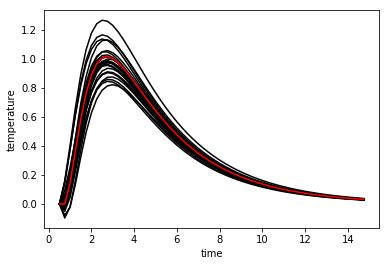

In [24]:
plt.plot(output.loc[output.index < 15,output.columns.str.startswith('ensemble')],'k')
plt.plot(output.loc[output.index < 15,'x'],'r')
plt.xlabel('time')
plt.ylabel('temperature')

Remember to remove the models from memory

In [25]:
x.finalize()
for ensembleMember in range(nEnsemble):
    ensemble[ensembleMember].finalize()